# Couple model

This notebook goes through the solution and simulation of the single model. 

We ensure the correctness of the solution by visualizing consumption and value functions and calculating Euler errors.

We ensure the empirical validity of the model by simulating a lifecycle and calculating retirement probabilities

Finally we time the model and simulation

### Setup

In [2]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
test = RetirementClass(couple=True)
test.solve()

In [4]:
import time
tic = time.time()
test.solve()
toc = time.time()
print(toc-tic)

12.38798189163208


In [22]:
erp_high = test.par.erp_high
alpha_0_male = test.par.alpha_0_male
alpha_0_female = test.par.alpha_0_female
phi_0_male = test.par.phi_0_male
phi_0_female = test.par.phi_0_female

In [54]:
test.par.erp_high = erp_high*1.5
test.par.alpha_0_male = alpha_0_male
test.par.alpha_0_female = alpha_0_female
test.par.phi_0_male = phi_0_male
test.par.phi_0_female = phi_0_female
test.solve(recompute=True)

In [55]:
print(test.par.erp_high)
print(test.par.alpha_0_male)
print(test.par.alpha_0_male)
print(test.par.phi_0_male)
print(test.par.phi_0_female)

274170.0
0.16
0.16
1.187
1.671


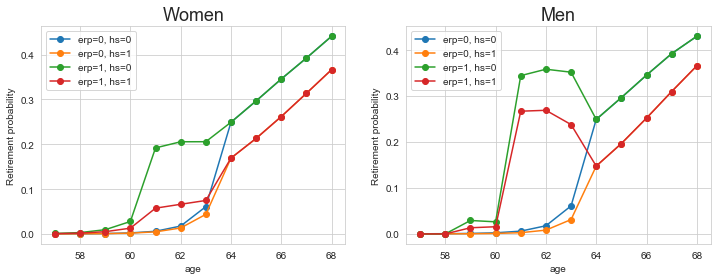

In [56]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.choice_probs_c(test,axs[0],ma=0,ST=[0,1,2,3])
figs.choice_probs_c(test,axs[1],ma=1,ST=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

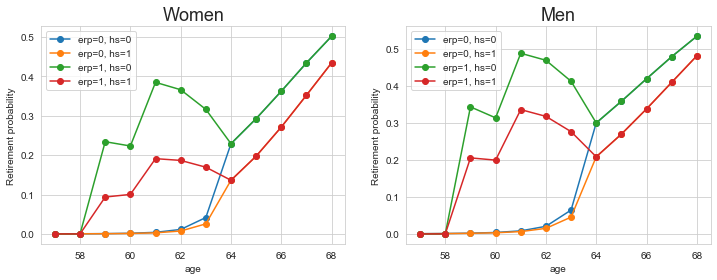

In [25]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.choice_probs(test.Single,axs[0],AD=0,MA=0,ST=[0,1,2,3])
figs.choice_probs(test.Single,axs[1],AD=0,MA=1,ST=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

# Consumption and value functions

### We consider a household with zero age difference, where both are low skilled and no erp

### d_h=d_w=0

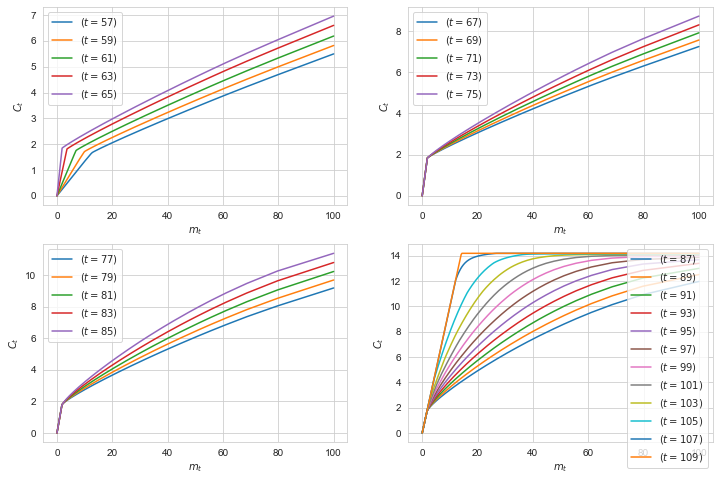

In [6]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(test,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(test,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(test,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(test,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[0],label=['t'])
plt.show()

### d_h=0 and d_w=1

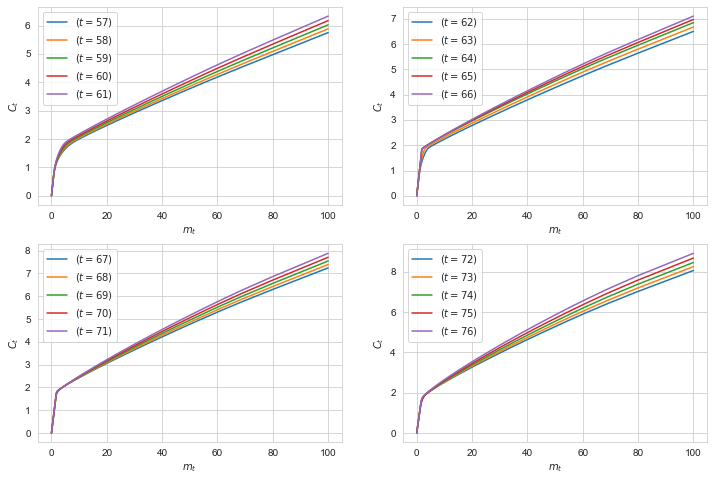

In [7]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[0],D_w=[1],label=['t'])
plt.show()

### d_h = 1 and d_w = 0

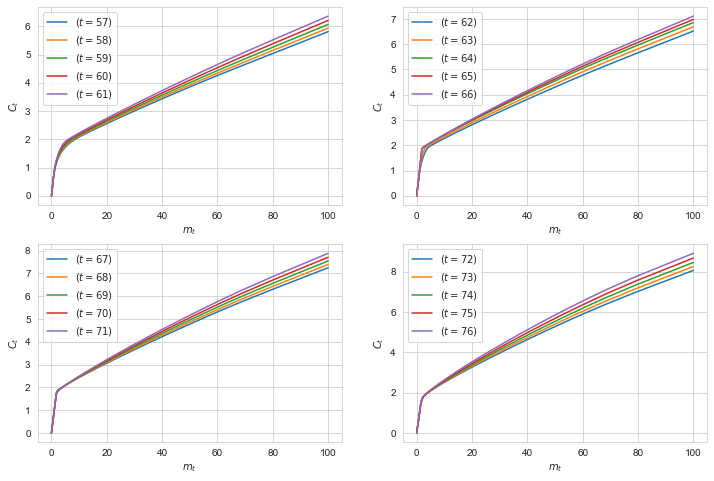

In [8]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[0],label=['t'])
plt.show()

### d_h = d_w = 1

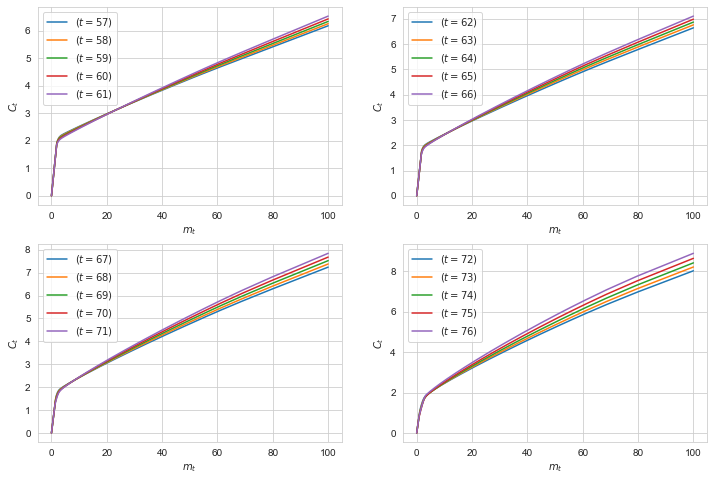

In [9]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[0],ST_w=[0],RA_h=[2],RA_w=[2],D_h=[1],D_w=[1],label=['t'])
plt.show()

### Now we consider a household with erp and high skilled

### d_h=d_w=0

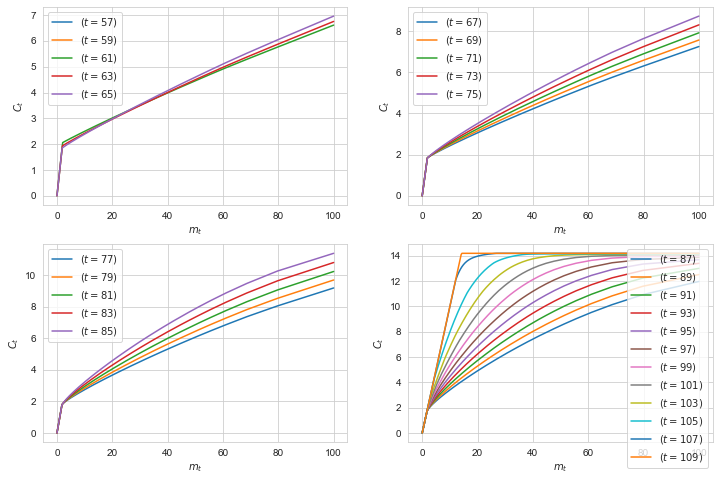

In [10]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(10))
figs.policy_c(test,axs[0,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(10,20))
figs.policy_c(test,axs[0,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(20,30))
figs.policy_c(test,axs[1,0],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
time = list(range(30,54))
figs.policy_c(test,axs[1,1],var='c',T=time[::2],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'])
plt.show()

### d_h=0 and d_w=1

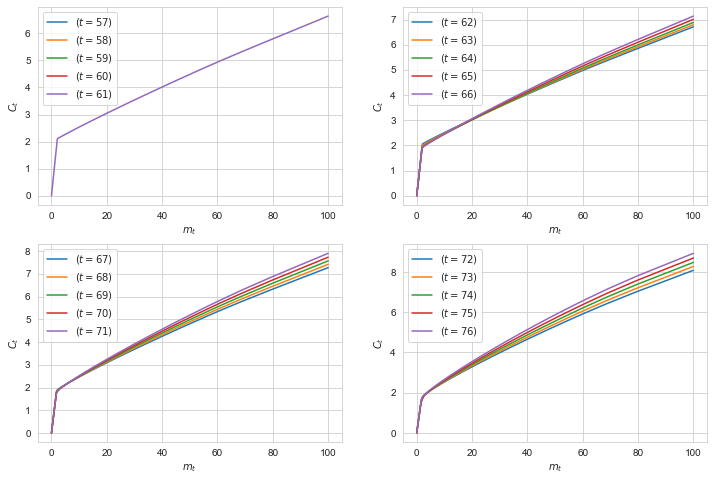

In [11]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'])
plt.show()

### d_h = d_w = 1

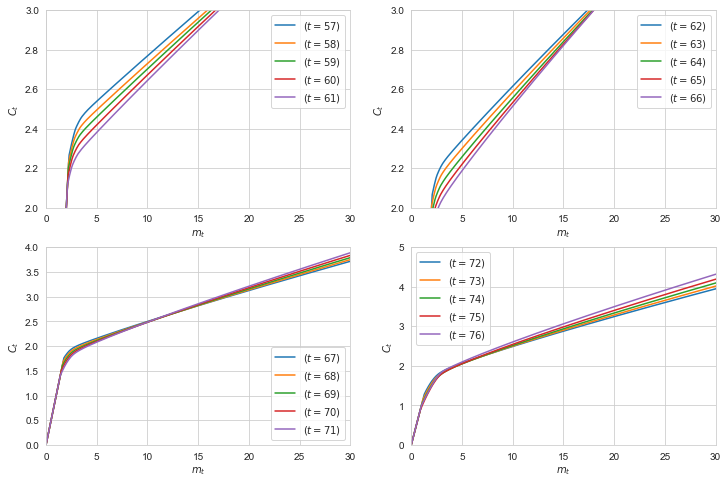

In [12]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(5))
figs.policy_c(test,axs[0,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'],xlim=[0,30],ylim=[2,3])
time = list(range(5,10))
figs.policy_c(test,axs[0,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'],xlim=[0,30],ylim=[2,3])
time = list(range(10,15))
figs.policy_c(test,axs[1,0],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
time = list(range(15,20))
figs.policy_c(test,axs[1,1],var='c',T=time,AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,5])
plt.show()

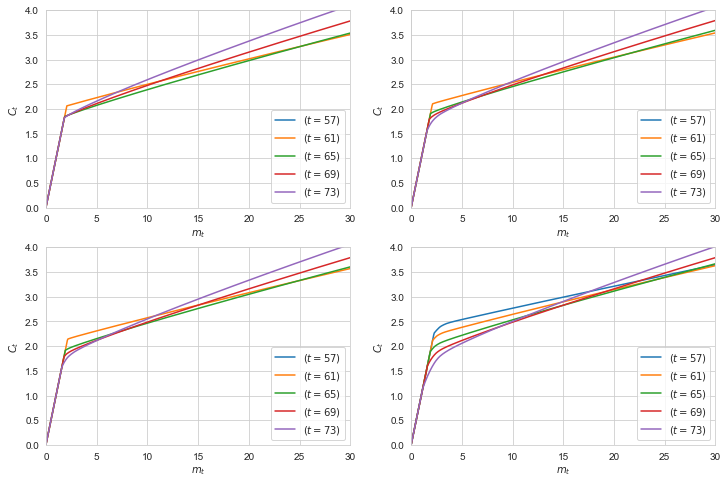

In [13]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[0],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[0,1],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[1,0],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[0],label=['t'],xlim=[0,30],ylim=[0,4])
figs.policy_c(test,axs[1,1],var='c',T=time[::4],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[1],D_w=[1],label=['t'],xlim=[0,30],ylim=[0,4])
plt.show()

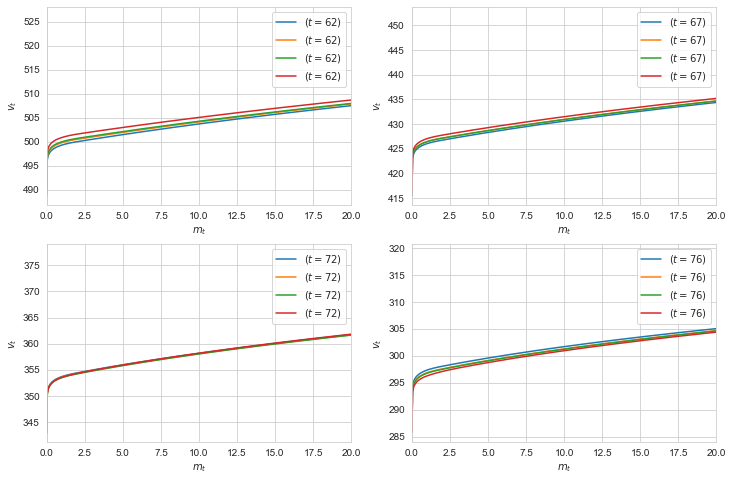

In [17]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.policy_c(test,axs[0,0],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[0,1],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[1,0],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
figs.policy_c(test,axs[1,1],var='v',T=[19],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['t'], xlim=[0,20])
plt.show()

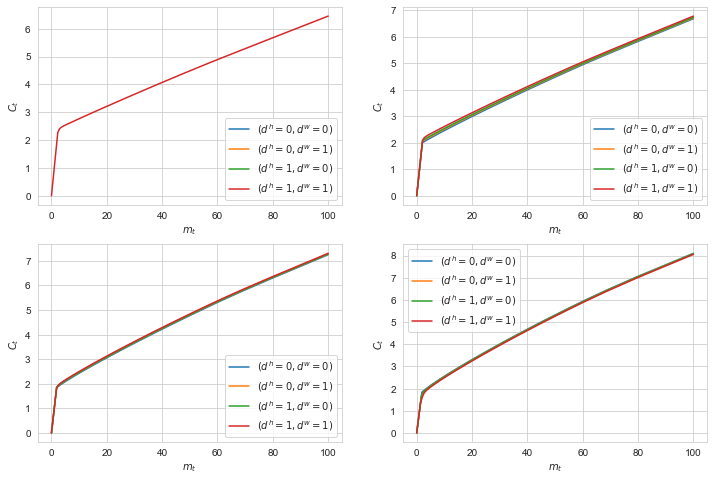

In [18]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='c',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[0,1],var='c',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,0],var='c',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,1],var='c',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
plt.show()

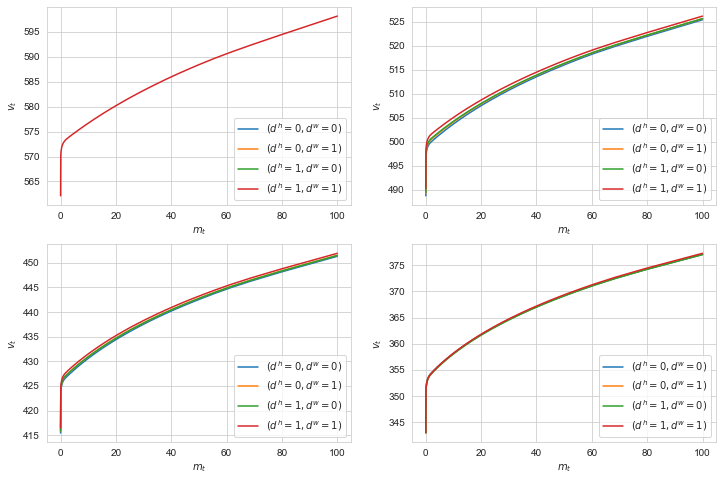

In [19]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy_c(test,axs[0,0],var='v',T=[0],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[0,1],var='v',T=[5],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,0],var='v',T=[10],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
figs.policy_c(test,axs[1,1],var='v',T=[15],AD=[0],ST_h=[3],ST_w=[3],RA_h=[0],RA_w=[0],D_h=[0,1],D_w=[0,1],label=['d'])
plt.show()

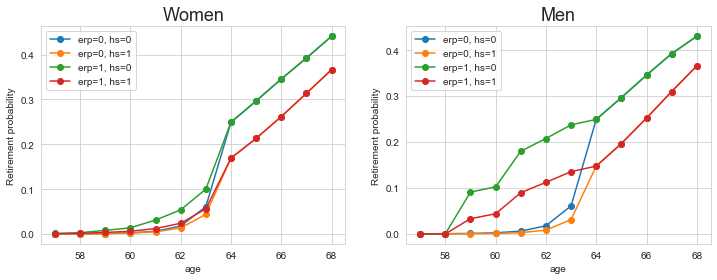

In [21]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.choice_probs_c(test,axs[0],ma=0,ST=[0,1,2,3])
figs.choice_probs_c(test,axs[1],ma=1,ST=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

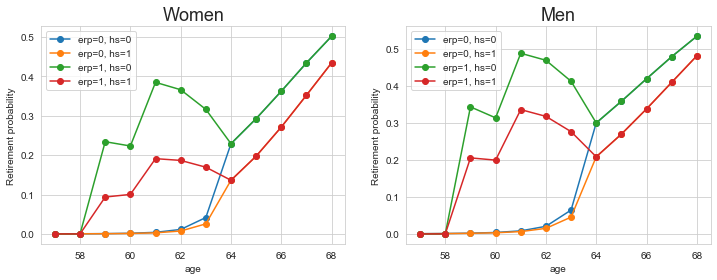

In [18]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.choice_probs(test.Single,axs[0],AD=0,MA=0,ST=[0,1,2,3])
figs.choice_probs(test.Single,axs[1],AD=0,MA=1,ST=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()